# Zensus 2022

In [1]:
import pandas as pd
import os
import sqlalchemy as sql
import numpy as np
import sqlite3

In [2]:
# Pfad zur Excel-Datei
file_path = 'C:\\Users\\hp\\OneDrive\\Desktop\\DBU\\SP3-1.Dateninfrastrukturen\\Pruefung\\Zensus\\input\\Zensus.xlsx'
# Lese die Excel-Datei ein und speichere die Blätter als einzelne DataFrames
sheets = pd.read_excel(file_path, sheet_name=None)
data_frames = {sheet_name: data for sheet_name, data in sheets.items() if sheet_name.startswith('CSV')}

# check
print("Dateninfrastruktur aufgesetzt und Excel-Daten geladen.")

Dateninfrastruktur aufgesetzt und Excel-Daten geladen.


In [4]:
# Speichern der DataFrames in separaten Variablen mit angepassten Namen
created_dfs = {}
for sheet_name, data in data_frames.items():
    # Ersetzen von '-' und '/' durch '_' in den Tabellenblätternamen
    new_sheet_name = sheet_name.replace('-', '_').replace('/', '_')
    
    # Ersetzen von '.', '/', '-' und '–' durch 0 in den Daten
    df = data.apply(lambda x: x.map(lambda y: 0 if y in ['.', '/', '-', '–'] else y))
    
    # Bereinigung der 'Regionalebene'-Spalte (Kreise)
    if 'Regionalebene' in df.columns:
        df['Regionalebene'] = df['Regionalebene'].str.replace('/', '')
        df['Regionalebene'] = df['Regionalebene'].str.replace(' ', '')
    # Umwandlung in numerische Typen für Spalten ab der 5.
    for col in df.columns[4:]:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)
    
    globals()[new_sheet_name] = df
    created_dfs[new_sheet_name] = df

# Anzeigen der neuen Namen der erstellten DataFrames
print("Erstellte DataFrames:")
for df_name in created_dfs.keys():
    print(df_name)

Erstellte DataFrames:
CSV_Klassenstufe
CSV_Schulform
CSV_Hoechster_Schulabschluss
CSV_Hoechster_berufl_Abschluss
CSV_Erwerbsstatus
CSV_ET_Alter
CSV_ET_Hoechst_berufl_Abschl
CSV_ET_Stellung_im_Beruf
CSV_ET_Beruf_Hauptgr_ISCO08
CSV_ET_Wirtschaftszweig


In [7]:
CSV_ET_Alter.head()


,Berichtszeitpunkt,_RS,Name,Regionalebene,ET_ALTER_ERW,ET_ALTER_ERW__M,ET_ALTER_ERW__W,ET_ALTER_ERW__1,ET_ALTER_ERW__1_M,ET_ALTER_ERW__1_W,...,ET_ALTER_ERW__4_W,ET_ALTER_ERW__5,ET_ALTER_ERW__5_M,ET_ALTER_ERW__5_W,ET_ALTER_ERW__6,ET_ALTER_ERW__6_M,ET_ALTER_ERW__6_W,ET_ALTER_ERW__7,ET_ALTER_ERW__7_M,ET_ALTER_ERW__7_W
0,20220515,0,Deutschland,Bund,41047770,21622700,19425070,1150950,601280,549660,...,4004730,10567270,5473450,5093820,4503560,2359280,2144280,1025860,604330,421530
1,20220515,1,Schleswig-Holstein,Land,1479510,773840,705670,43110,22130,20990,...,147540,408640,209070,199570,165800,86770,79030,38700,23580,15120
2,20220515,1001,"Flensburg, Stadt",StadtkreiskreisfreieStadtLandkreis,48070,26040,22030,1190,660,540,...,4210,10530,5490,5030,4550,2500,2050,1160,710,450
3,20220515,10010000000,"Flensburg, Stadt",Gemeinde,48070,26040,22030,1190,660,540,...,4210,10530,5490,5030,4550,2500,2050,1160,710,450
4,20220515,1002,"Kiel, Landeshauptstadt",StadtkreiskreisfreieStadtLandkreis,128800,67060,61740,3900,1800,2100,...,10450,27330,13800,13530,11580,5790,5790,2360,1510,850


In [24]:
c=CSV_Erwerbsstatus[CSV_Erwerbsstatus['ERWERBSTAT_KURZ_STP']>500000]

In [29]:
c[c['Regionalebene']=='Gemeinde'].sort_values(by='ERWERBSTAT_KURZ_STP',ascending=False).head(10)

,Berichtszeitpunkt,_RS,Name,Regionalebene,ERWERBSTAT_KURZ_STP,ERWERBSTAT_KURZ_STP__M,ERWERBSTAT_KURZ_STP__W,ERWERBSTAT_KURZ_STP__1,ERWERBSTAT_KURZ_STP__1_M,ERWERBSTAT_KURZ_STP__1_W,ERWERBSTAT_KURZ_STP__11,ERWERBSTAT_KURZ_STP__11_M,ERWERBSTAT_KURZ_STP__11_W,ERWERBSTAT_KURZ_STP__12,ERWERBSTAT_KURZ_STP__12_M,ERWERBSTAT_KURZ_STP__12_W,ERWERBSTAT_KURZ_STP__2,ERWERBSTAT_KURZ_STP__2_M,ERWERBSTAT_KURZ_STP__2_W
9649,20220515,110000000000,"Berlin, Stadt",Gemeinde,3484430,1700520,1783910,1920930,997360,923570,1772180,915470,856710,148750,81890,66860,1563500,703160,860340
1209,20220515,20000000000,"Hamburg, Freie und Hansestadt",Gemeinde,1737860,843660,894200,1022850,524400,498440,948980,488430,460550,73870,35980,37890,715020,319260,395760
7122,20220515,91620000000,"München, Landeshauptstadt",Gemeinde,1444990,704220,740770,893000,457290,435710,837190,431890,405300,55810,25400,30410,551990,246930,305060
2407,20220515,53150000000,"Köln, Stadt",Gemeinde,997330,485530,511810,565670,292870,272800,525550,272000,253550,40120,20870,19250,431670,192660,239010
2780,20220515,64120000000,"Frankfurt am Main, Stadt",Gemeinde,732240,358780,373460,410600,215810,194790,377940,199320,178620,32660,16490,16160,321630,142970,178670
2323,20220515,51110000000,"Düsseldorf, Stadt",Gemeinde,598950,289960,308990,330820,172000,158820,304880,158660,146230,25940,13340,12600,268130,117960,150170
5700,20220515,81110000000,"Stuttgart, Landeshauptstadt",Gemeinde,593900,294300,299590,338280,178370,159910,315900,166600,149300,22380,11770,10610,255620,115930,139680
2683,20220515,59130000000,"Dortmund, Stadt",Gemeinde,588400,290690,297710,301790,162880,138910,272810,147130,125680,28980,15750,13230,286610,127810,158800
2317,20220515,40110000000,"Bremen, Stadt",Gemeinde,560630,276040,284590,298560,160030,138530,272220,145720,126500,26340,14310,12030,262070,116010,146060
2327,20220515,51130000000,"Essen, Stadt",Gemeinde,559380,272320,287060,287680,151120,136560,263660,137990,125670,24020,13130,10890,271700,121200,150500


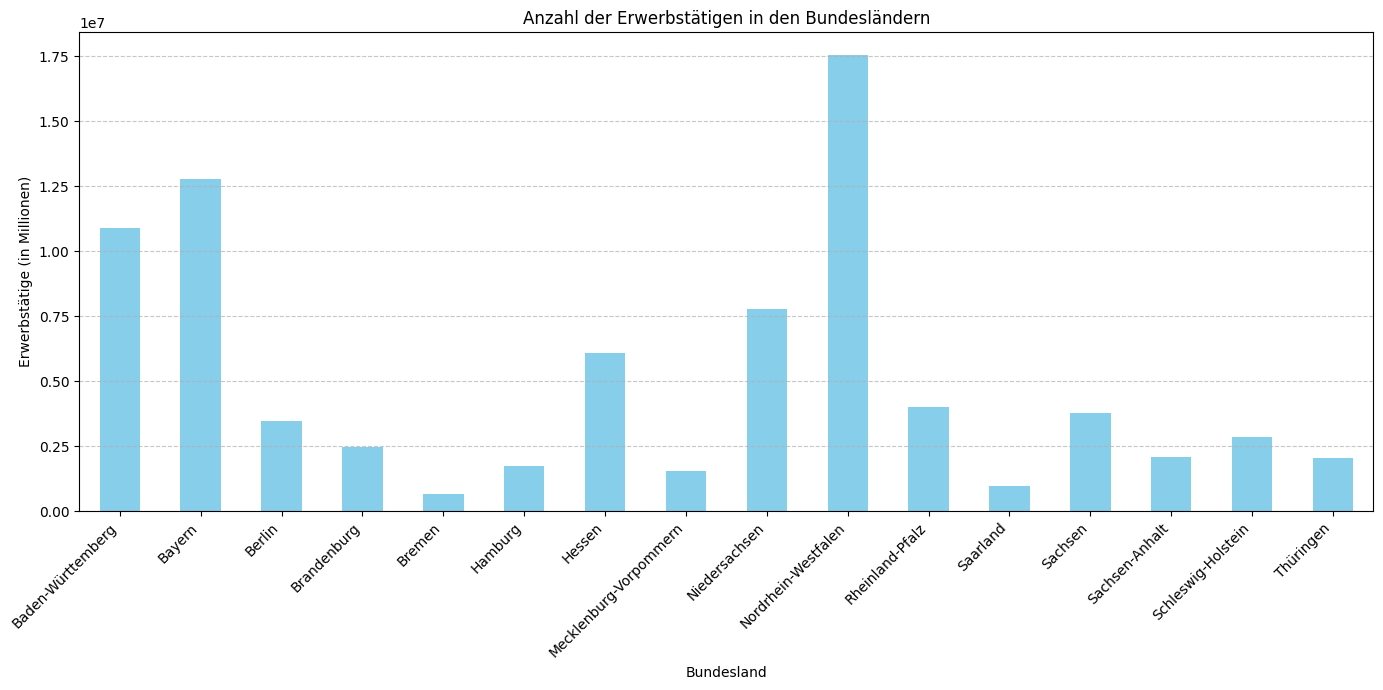

In [26]:
import matplotlib.pyplot as plt

# Filtern der Daten für Bundesländer
bundeslaender_df = CSV_Erwerbsstatus[CSV_Erwerbsstatus['Regionalebene'] == 'Land']

# Summieren der Erwerbstätigen für jedes Bundesland
erwerbstaetige_sum = bundeslaender_df.groupby('Name')['ERWERBSTAT_KURZ_STP'].sum()

# Erstellen des Balkendiagramms
plt.figure(figsize=(14, 7))
erwerbstaetige_sum.plot(kind='bar', color='skyblue')
plt.title('Anzahl der Erwerbstätigen in den Bundesländern')
plt.xlabel('Bundesland')
plt.ylabel('Erwerbstätige (in Millionen)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


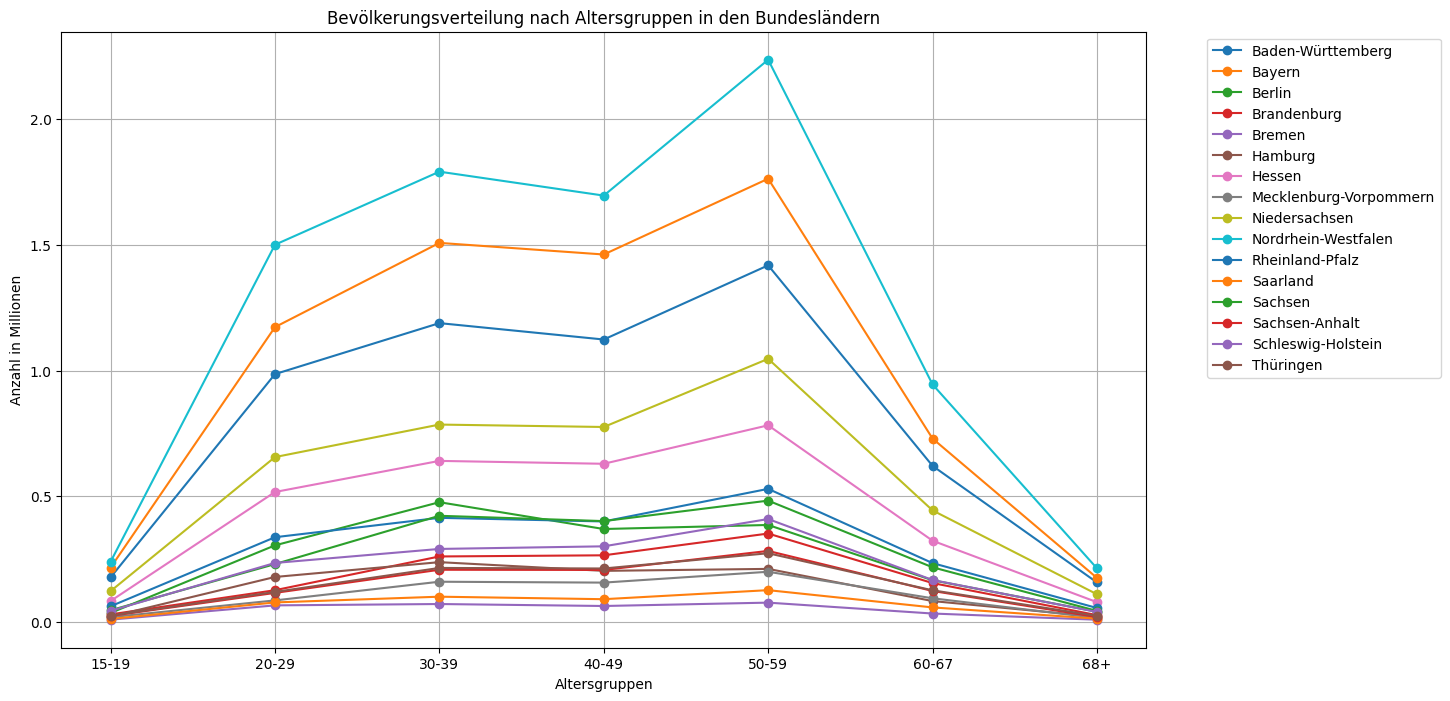

In [27]:
import matplotlib.pyplot as plt

# Daten filtern und nur die Einträge für 'Land' in der Spalte 'Regionalebene' behalten
df_land = CSV_ET_Alter[CSV_ET_Alter['Regionalebene'] == 'Land']

# Altersgruppen-Labels und entsprechende Spaltennamen
altersgruppen = ['15-19', '20-29', '30-39', '40-49', '50-59', '60-67', '68+']
altersgruppen_spalten = [
    'ET_ALTER_ERW__1', 'ET_ALTER_ERW__2', 'ET_ALTER_ERW__3', 'ET_ALTER_ERW__4',
    'ET_ALTER_ERW__5', 'ET_ALTER_ERW__6', 'ET_ALTER_ERW__7'
]

# Aggregieren der Daten nach Bundesländern und Altersgruppen
bundesland_alter_data = df_land.groupby('Name')[altersgruppen_spalten].sum()

# Plot erstellen
plt.figure(figsize=(14, 8))

for bundesland in bundesland_alter_data.index:
    alter_counts = bundesland_alter_data.loc[bundesland]
    plt.plot(altersgruppen, alter_counts.values / 1e6, marker='o', linestyle='-', label=bundesland)

# Achsenbeschriftungen und Titel
plt.xlabel('Altersgruppen')
plt.ylabel('Anzahl in Millionen')
plt.title('Bevölkerungsverteilung nach Altersgruppen in den Bundesländern')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


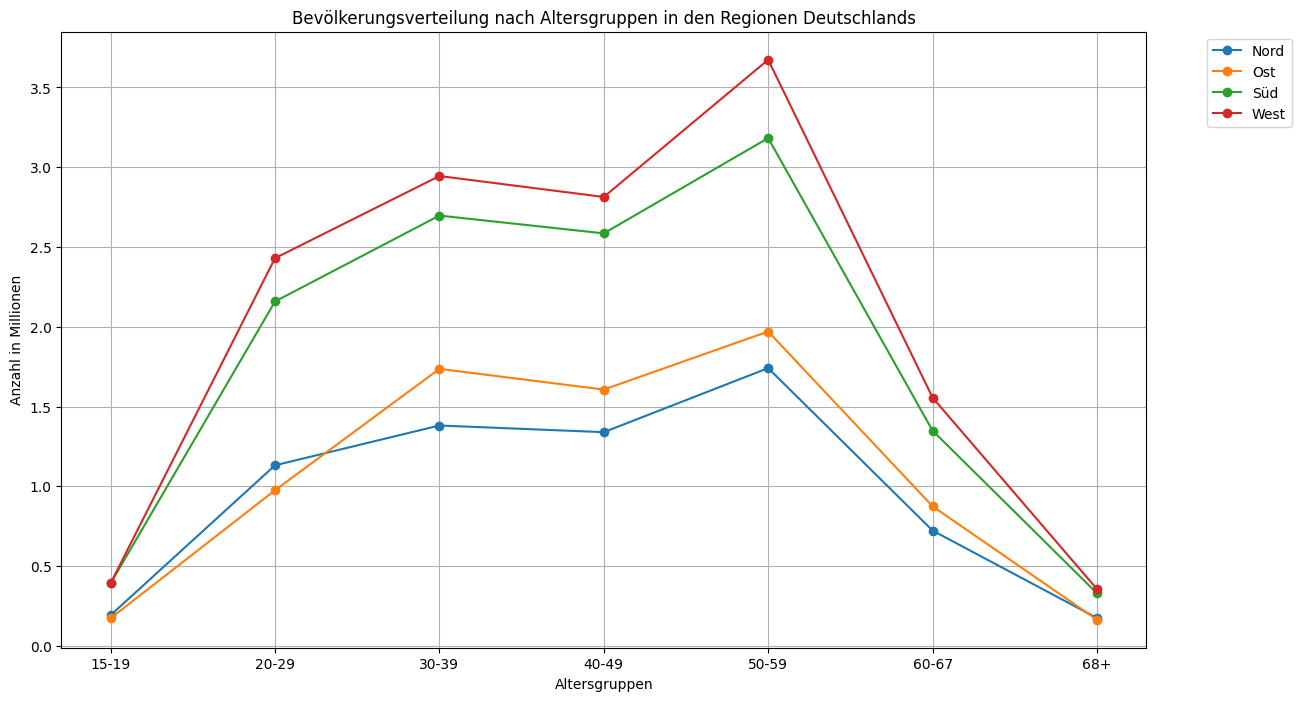

In [28]:
import matplotlib.pyplot as plt

# Zuordnung der Bundesländer zu den Regionen
regionen = {
    'Nord': ['Schleswig-Holstein', 'Hamburg', 'Niedersachsen', 'Bremen'],
    'Ost': ['Mecklenburg-Vorpommern', 'Brandenburg', 'Sachsen-Anhalt', 'Thüringen', 'Sachsen', 'Berlin'],
    'Süd': ['Bayern', 'Baden-Württemberg'],
    'West': ['Nordrhein-Westfalen', 'Hessen', 'Rheinland-Pfalz', 'Saarland']
}

# Daten filtern und nur die Einträge für 'Land' in der Spalte 'Regionalebene' behalten
df_land = CSV_ET_Alter[CSV_ET_Alter['Regionalebene'] == 'Land']

# Altersgruppen-Labels und entsprechende Spaltennamen
altersgruppen = ['15-19', '20-29', '30-39', '40-49', '50-59', '60-67', '68+']
altersgruppen_spalten = [
    'ET_ALTER_ERW__1', 'ET_ALTER_ERW__2', 'ET_ALTER_ERW__3', 'ET_ALTER_ERW__4',
    'ET_ALTER_ERW__5', 'ET_ALTER_ERW__6', 'ET_ALTER_ERW__7'
]

# Initialisieren eines DataFrame für die aggregierten Daten nach Regionen
region_alter_data = pd.DataFrame(columns=altersgruppen_spalten)

# Aggregieren der Daten nach Regionen
for region, laender in regionen.items():
    region_df = df_land[df_land['Name'].isin(laender)]
    region_alter_data.loc[region] = region_df[altersgruppen_spalten].sum()

# Plot erstellen
plt.figure(figsize=(14, 8))

for region in region_alter_data.index:
    alter_counts = region_alter_data.loc[region]
    plt.plot(altersgruppen, alter_counts.values / 1e6, marker='o', linestyle='-', label=region)

# Achsenbeschriftungen und Titel
plt.xlabel('Altersgruppen')
plt.ylabel('Anzahl in Millionen')
plt.title('Bevölkerungsverteilung nach Altersgruppen in den Regionen Deutschlands')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
# Zum visualisieren der Daten in SQLite

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Verbindung zur SQLite-Datenbank herstellen
conn = sqlite3.connect('deine_datenbank.db')

# Daten aus der Faktentabelle abrufen
query = "SELECT * FROM faktentabelle"
df = pd.read_sql_query(query, conn)

# Beispiel für eine Visualisierung
plt.figure(figsize=(12, 6))
plt.bar(df['Landesschluessel'], df['Erwerbstätige'])
plt.xlabel('Landesschlüssel')
plt.ylabel('Erwerbstätige')
plt.title('Erwerbstätige nach Bundesland')
plt.show()